# Task 2: Prediction using Unsupervised ML
### by Arijit Singh

- **To predict the optimum number of clusters and represent it visually from the given ‘Iris’ dataset**

- **Data : https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view**

## 1. Importing Libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
%matplotlib inline

## 2. Importing Dataset

In [13]:
iris= datasets.load_iris()
df= pd.DataFrame(iris.data, columns= iris.feature_names)
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [14]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [15]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [16]:
x = df.to_numpy()

## 3. Scaling the Dataset

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dfs = scaler.fit_transform(df)

In [18]:
pd.DataFrame(dfs).describe()

,0,1,2,3
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.690315e-15,-1.842970e-15,-1.698641e-15,-1.409243e-15
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


## 4. Finding Optimum No. of Clusters

In [19]:
temp = []
for cluster in range(1,21):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster)
    kmeans.fit(dfs)
    temp.append(kmeans.inertia_)

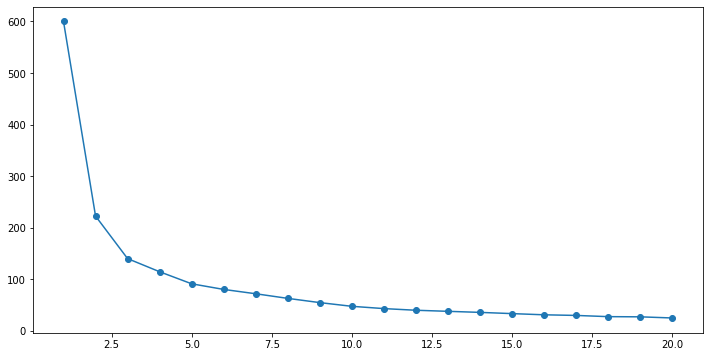

In [20]:
plt.figure(figsize=(12,6))
frame_scaled = pd.DataFrame({'Cluster':range(1,21), 'Inertia':temp})
plt.plot(frame_scaled['Cluster'], frame_scaled['Inertia'], marker='o')

## 5. Applying KMeans 

In [21]:
kmeans = KMeans(n_jobs = -1, n_clusters = 4)
kmeans.fit(dfs)
pred = kmeans.predict(dfs)
frame = pd.DataFrame(dfs)
frame['Cluster'] = pred
frame['Cluster'].value_counts()

2    53
1    47
3    25
0    25
Name: Cluster, dtype: int64

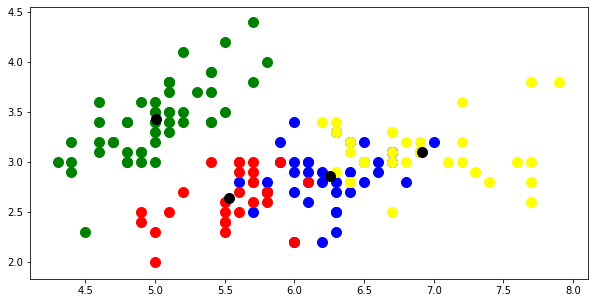

In [22]:
kmeans=KMeans(4)
y=kmeans.fit_predict(x)
fig=plt.figure(figsize=(10,5))
plt.scatter(x[y == 0, 0], x[y == 0, 1], s = 100, c = 'blue')
plt.scatter(x[y == 1, 0], x[y == 1, 1], s = 100, c = 'green')
plt.scatter(x[y == 2, 0], x[y == 2, 1], s = 100, c = 'red')
plt.scatter(x[y == 3, 0], x[y == 3, 1], s = 100, c = 'yellow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'black')

- **Though increasing values of clusters give rise to accuracy, it strays away from the concept of clusters and thus not suitable. Here K=4 gives required clusters, which can be verified from the elbow curve**